In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle
# 导入向量化后的数据集
np_vectorized_tfidf = pickle.load(open('vectorized_generated_corpus_tfidf.pkl', 'rb'))

In [3]:
np_vectorized_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17705395, 0.1748451 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21242656,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [4]:
np_vectorized_tfidf.shape

(1200, 48)

In [5]:
np_vectorized_tfidf.dtype

dtype('float64')

In [6]:
# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = np_vectorized_tfidf,
                                      batch_size = 32,
                                      shuffle = True)

In [8]:
# Creating a PyTorch class
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 48 ==> 3
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(48, 24),
            torch.nn.ReLU(),
            torch.nn.Linear(24, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 3)
        ).double() # Change parameters dtype to double
        
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 3 ==> 48
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 24),
            torch.nn.ReLU(),
            torch.nn.Linear(24, 48),
            # torch.nn.Sigmoid()
        ).double() # Change parameters dtype to double

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return (encoded, decoded) # encoded is the result of dimensionality reduction

In [ ]:
# Model Initialization
model = AE()
model.cuda()  # move the model to GPU

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.01
optimizer = torch.optim.Adam(model.parameters(),
							lr = 0.01,
							weight_decay = 0.00000001)

In [ ]:
epochs = 100
iters = 0
outputs = []
losses = []

for epoch in range(1, epochs + 1):
    print('Epoch:', epoch)
    for essay in loader:
        iters += 1

        essay = essay.cuda()  # move data to GPU

        # Output of Autoencoder
        _, reconstructed = model(essay)

        # Calculating the loss function
        loss = loss_function(reconstructed, essay)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())
        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is: {loss.item()}")

    outputs.append((epoch, essay, reconstructed))

Epoch: 1
Epoch: 2
Epoch: 3
Iteration: 100, loss is: 0.015141462654593216
Epoch: 4
Epoch: 5
Epoch: 6
Iteration: 200, loss is: 0.01629802708665977
Epoch: 7
Epoch: 8
Iteration: 300, loss is: 0.014652001424911265
Epoch: 9
Epoch: 10
Epoch: 11
Iteration: 400, loss is: 0.013311239970062106
Epoch: 12
Epoch: 13
Epoch: 14
Iteration: 500, loss is: 0.013498535457445296
Epoch: 15
Epoch: 16
Iteration: 600, loss is: 0.012365273052011289
Epoch: 17
Epoch: 18
Epoch: 19
Iteration: 700, loss is: 0.01171249553142974
Epoch: 20
Epoch: 21
Epoch: 22
Iteration: 800, loss is: 0.01190958681039337
Epoch: 23
Epoch: 24
Iteration: 900, loss is: 0.012659361186044115
Epoch: 25
Epoch: 26
Epoch: 27
Iteration: 1000, loss is: 0.011918749266388065
Epoch: 28
Epoch: 29
Iteration: 1100, loss is: 0.012720356646576636
Epoch: 30
Epoch: 31
Epoch: 32
Iteration: 1200, loss is: 0.012831379468895197
Epoch: 33
Epoch: 34
Epoch: 35
Iteration: 1300, loss is: 0.011519189676057019
Epoch: 36
Epoch: 37
Iteration: 1400, loss is: 0.012147397898

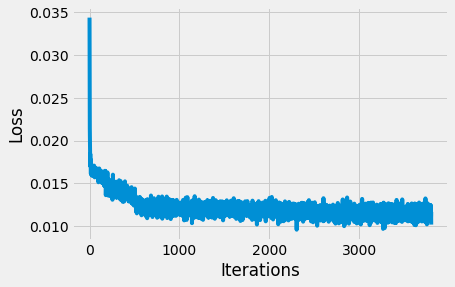

In [ ]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

In [ ]:
outputs[-1]

(100,
 tensor([[0.1934, 0.1910, 0.0000, 0.2012, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.1226, 0.1202, 0.0000, 0.0000, 0.1200,
          0.1211, 0.1213, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1848, 0.1920, 0.3932,
          0.1861, 0.0000, 0.7430],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3879, 0.0000, 0.1873,
          0.0000, 0.5544, 0.3784, 0.3732, 0.0000, 0.1210, 0.0000, 0.0000, 0.1208,
          0.1219, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1882, 0.0000, 0.0000, 0.1873, 0.0000, 0.0000, 0.1933, 0.0000,
          0.0000, 0.1943, 0.1870],
         [0.2064, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1986,
          0.0000, 0.00

## 保存模型参数

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 保存模型参数
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/model/SixTypes-AutoEncoder-K-Means-TFIDF-3d.pth')

## 加载模型参数

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# 加载模型参数
model = AE()
model.cuda() # move the model to GPU

model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/model/SixTypes-AutoEncoder-K-Means-TFIDF-3d.pth'))

<All keys matched successfully>

In [10]:
# Dimensionality Reduction by the trained AE model

decomposition_data = []
for essay in np_vectorized_tfidf:
    essay = torch.from_numpy(essay).cuda()
    encoded, decoded = model(essay)
    decomposition_data.append(encoded.cpu().data.numpy())

decomposition_data = np.array(decomposition_data)

In [11]:
decomposition_data

array([[ 1.28456534e+01,  7.54120163e+00,  2.11558055e-02],
       [ 1.80106478e+01,  1.06835606e+01,  3.00293980e-02],
       [ 1.85959112e+01,  1.10396322e+01,  3.10348957e-02],
       ...,
       [ 6.38450368e-01,  1.14395130e-01,  1.83518107e-04],
       [ 5.22106129e-01,  4.36118274e-02, -1.63642739e-05],
       [ 6.95940705e-01,  1.49371988e-01,  2.82287978e-04]])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


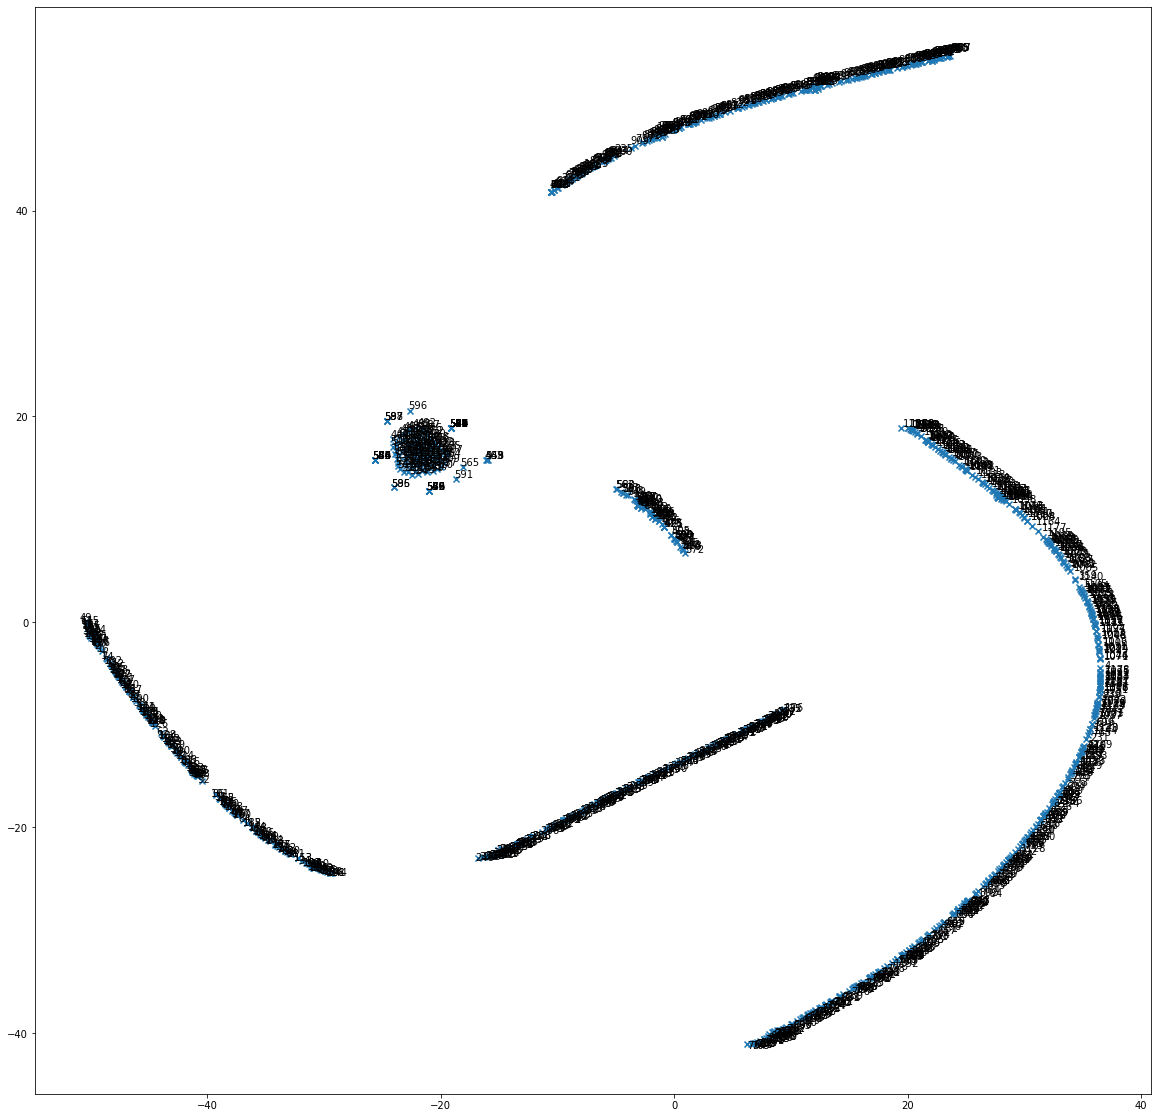

In [12]:
from sklearn.manifold import TSNE
# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data_2d = tsne.fit_transform(decomposition_data)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], marker='x')
for i in range(len(decomposition_data_2d)):
    plt.text(decomposition_data_2d[:, 0][i] * 1.01, decomposition_data_2d[:, 1][i] * 1.01, i, fontsize=10)
plt.show()

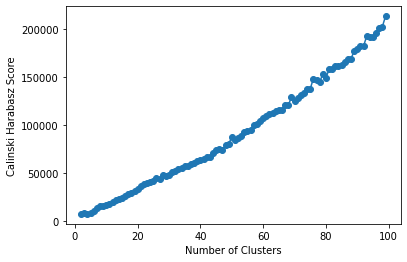

In [15]:
# K-means 算法聚类并利用 Calinski Harabasz Score 评估效果
from sklearn.cluster import KMeans
from sklearn import metrics
calinski_harabasz_score_list = []
for n_cluster in range(2, 100):
    y_pred = KMeans(n_clusters=n_cluster, init='k-means++', random_state=9).fit_predict(decomposition_data)
    current_score = metrics.calinski_harabasz_score(decomposition_data, y_pred)
    calinski_harabasz_score_list.append(current_score)

plt.plot(range(2,100), calinski_harabasz_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

In [16]:
calinski_harabasz_score_list.index(max(calinski_harabasz_score_list))

97

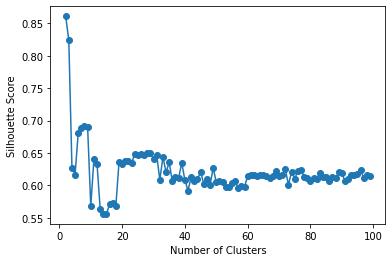

In [17]:
# K-means 算法聚类并利用 Silhouette Score（轮廓系数）评估效果
silhouette_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = metrics.silhouette_score(decomposition_data, km.labels_ , metric='euclidean')
    silhouette_score_list.append(current_score)

plt.plot(range(2,100), silhouette_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
silhouette_score_list.index(max(silhouette_score_list))

0

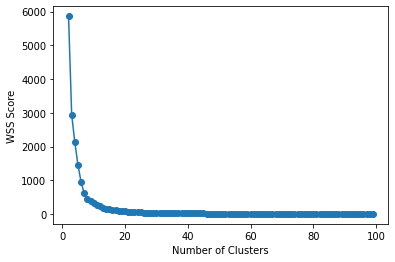

In [19]:
# K-means 算法聚类并利用 WSS（Within-cluster Sum of Squares）评估效果
WSS_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = km.inertia_
    WSS_score_list.append(current_score)

plt.plot(range(2,100), WSS_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.show()

## 用 AutoEncoder 降到 3 维后直接用 K-means 来聚类

In [20]:
# 选用 k 值做 K-means 算法聚类（用 AutoEncoder 降到 3 维后直接用 K-means 聚类）
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data)

In [21]:
print(y_pred[:10])

[4 1 1 1 3 4 4 1 4 2]


In [22]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data_2d)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data_2d[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data_2d[i]))

In [23]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

4 -42.16517
1 -48.50834
3 11.306138
2 -33.690933
0 -4.20695
5 11.187817


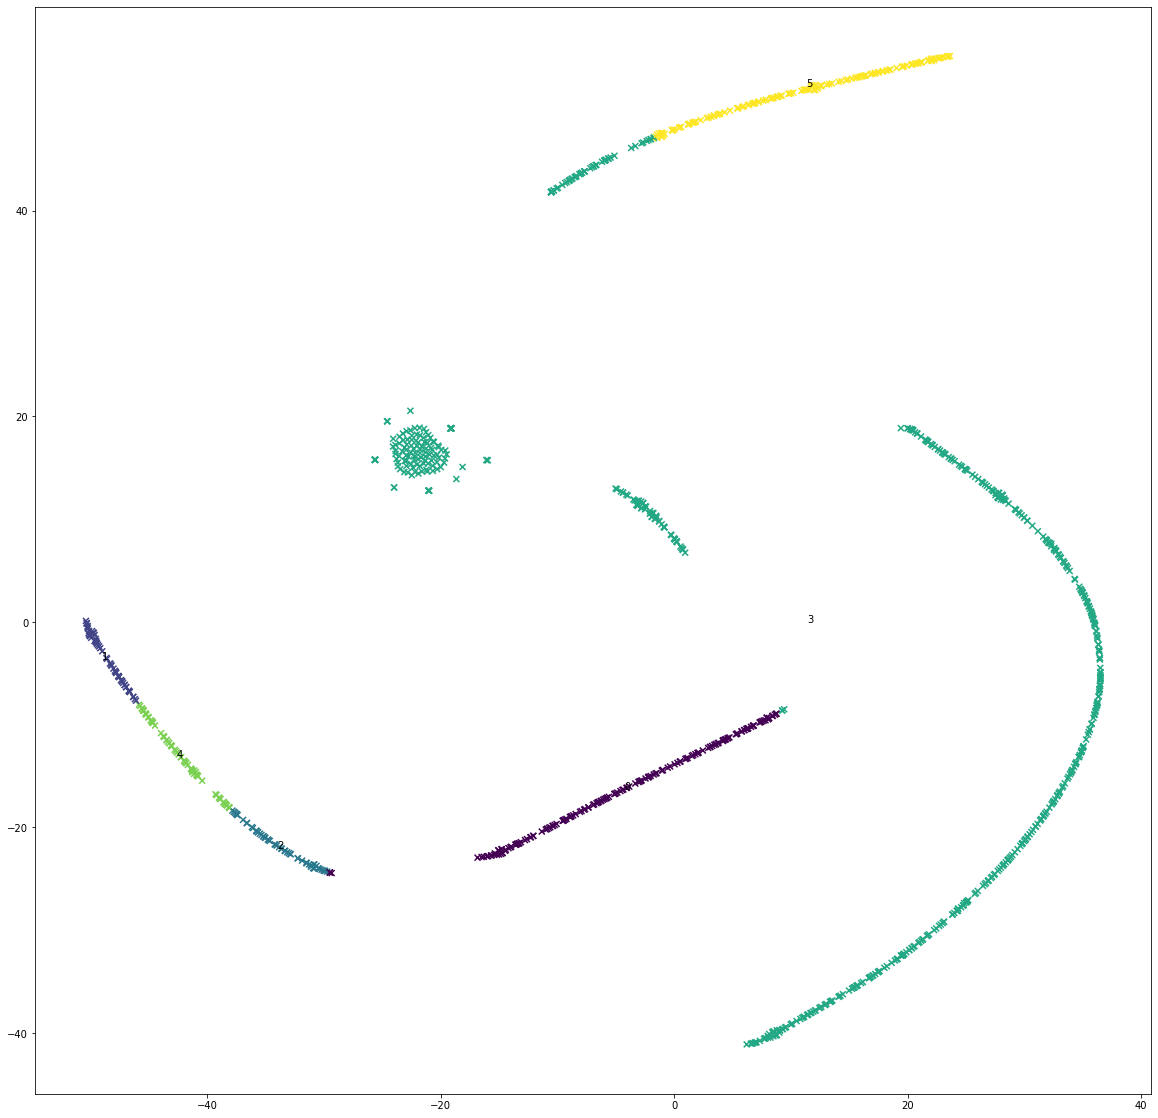

In [24]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [25]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data, y_pred)

10180.183780362064

In [26]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data)
metrics.silhouette_score(decomposition_data, km.labels_, metric='euclidean')

0.6814039082676473

In [27]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [28]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [29]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.5036449656723034

In [30]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.6820752575450845

In [31]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.5794347822458291

In [32]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.31544915322305833

In [33]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.5765585205558678

In [34]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.5112264592522432

## 用 AutoEncoder 降到 3 维后再用 T-SNE 降到 2 维的结果，最后用 K-means 来聚类

In [50]:
# 选用 k 值做 K-means 算法聚类（用 AutoEncoder 降到 4 维后再用 T-SNE 降到 2 维的结果，最后用 K-means 来聚类）
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data_2d)

In [51]:
print(y_pred[:10])

[2 2 2 2 5 2 2 2 2 2]


In [52]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data_2d)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data_2d[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data_2d[i]))

In [53]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

2 -41.18603
5 31.038948
4 20.70352
1 6.2132254
0 -3.5427148
3 -15.734618


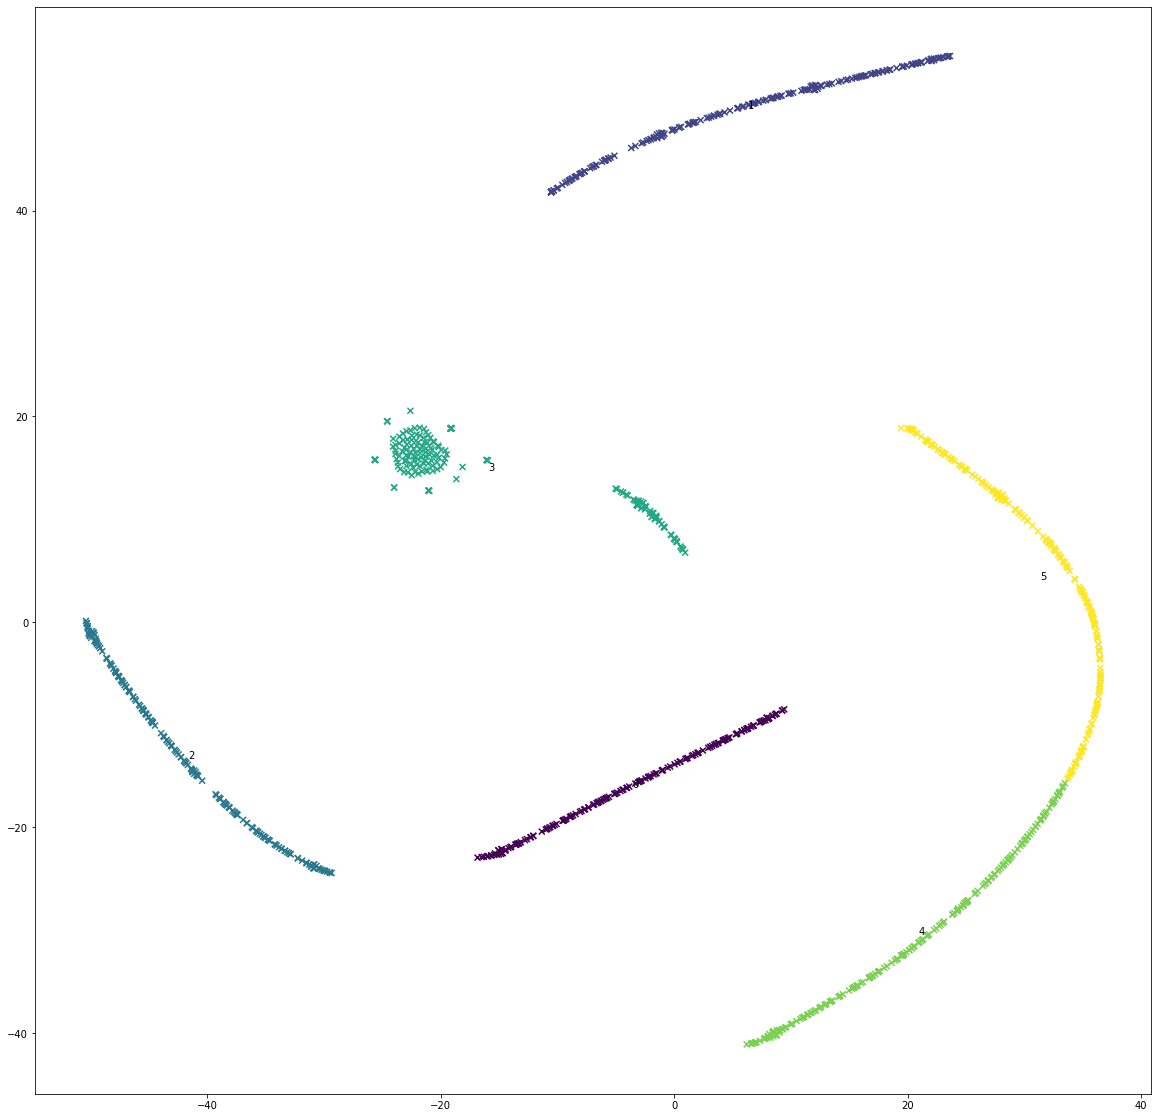

In [54]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [55]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data_2d, y_pred)

2629.098862538306

In [57]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data_2d)
metrics.silhouette_score(decomposition_data_2d, km.labels_, metric='euclidean')

0.61969787

In [58]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [59]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [60]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.789996434308948

In [61]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.79133101703129

In [62]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.7906631625005359

In [63]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.7994459945812609

In [64]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.7894293564691197

In [65]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.8328360941363924